# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


# matplotlib inline

## Carregar os dataset de treino e de teste

In [2]:
TRAINING_DATASET_SOURCE = 'training_data.csv'
TEST_DATASET_SOURCE = 'test_data.csv'

In [3]:
train_df = pd.read_csv(TRAINING_DATASET_SOURCE)
test_df = pd.read_csv(TEST_DATASET_SOURCE)

## Exploração de dados

In [4]:
train_df.head()

train_df.describe()

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


In [5]:
for column in train_df.columns:
    train_df[column].value_counts()

## Visualização gráfica dos dados

<AxesSubplot: >

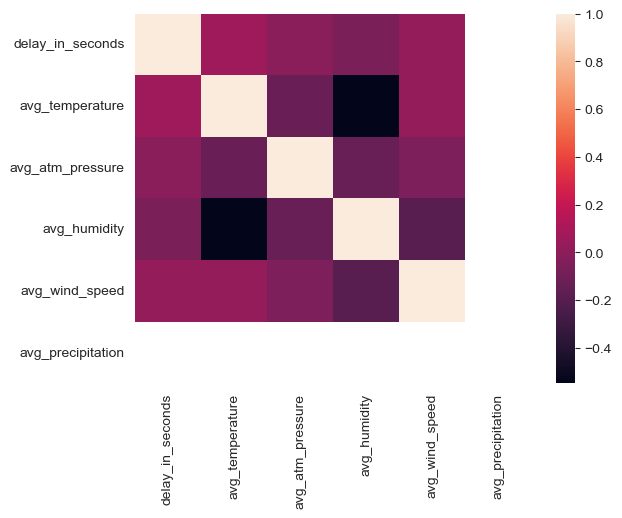

In [6]:
sns.heatmap(train_df.corr(numeric_only=True))

<AxesSubplot: >

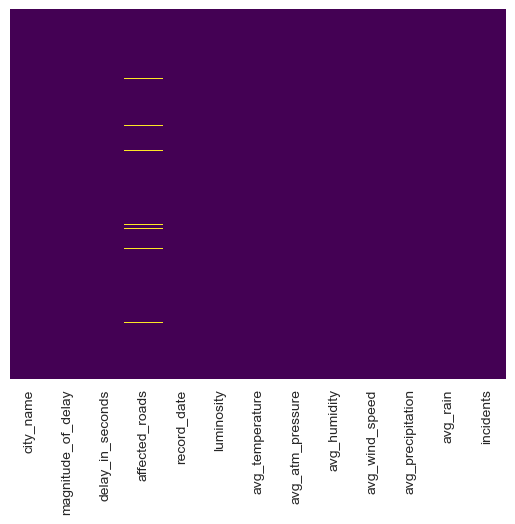

In [7]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot: xlabel='luminosity', ylabel='Count'>

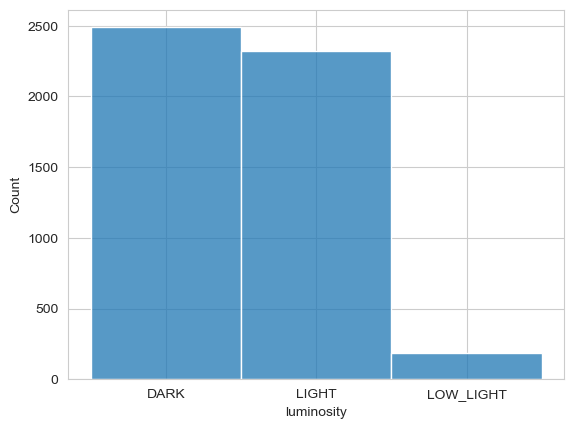

In [8]:
sns.histplot(train_df['luminosity'])

<AxesSubplot: xlabel='avg_rain', ylabel='Count'>

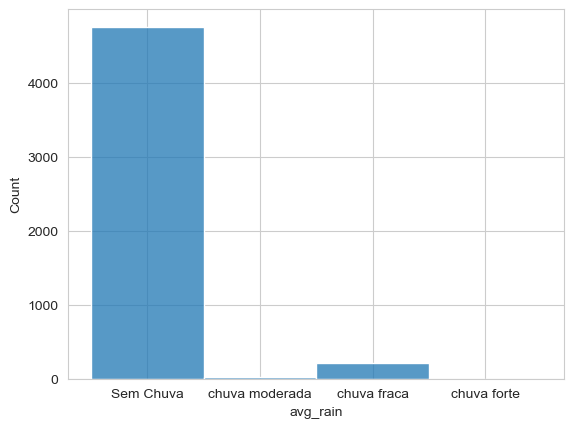

In [9]:
sns.histplot(train_df['avg_rain'])

In [16]:
train_df['incidents'].unique()

array(['None', 'Low', 'Very_High', 'High', 'Medium'], dtype=object)

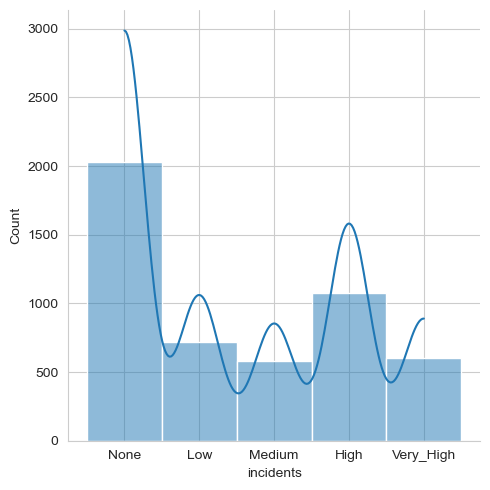

In [25]:
train_df['incidents'] = pd.Categorical(train_df['incidents'], categories=['None', 'Low', 'Medium', 'High', 'Very_High'])

sns.displot(train_df['incidents'], kde=True)

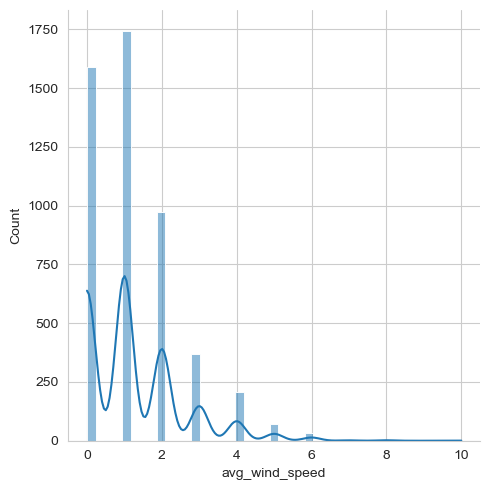

In [11]:
sns.displot(train_df['avg_wind_speed'], kde=True)

In [12]:
train_df.isna().sum()

city_name              0
magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_precipitation      0
avg_rain               0
incidents              0
dtype: int64